In [1]:
import json
from pathlib import Path
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("white")
#sns.set_palette("gist_gray_r")
sns.set_palette("Dark2")

In [2]:

DATA_ROOT = Path("../data")
C2V_ROOT = DATA_ROOT / "community2vec"

MONTHS = sorted(["2021-04", "2021-05", "2021-06", "2021-07", "2021-08", "2021-09", "2021-10", "2021-11", "2021-12", "2022-01", "2022-02", "2022-03"
])
VIZ_PATH = DATA_ROOT / "paper_visuals"

In [3]:
# Use regexes to parse out specific analogy results, unfortunately hacky
# TODO change the way these metrics are saved when model is trained
mlb_pattern = re.compile(r"major-league-baseball:(\d+)/(\d+)")
nba_pattern = re.compile(r"national-basketball-association:(\d+)/(\d+)")
nfl_pattern = re.compile(r"national-football-league:(\d+)/(\d+)")
nhl_pattern = re.compile(r"national-hockey-league:(\d+)/(\d+)")
university_pattern = re.compile(r"university-city-pairs:(\d+)/(\d+)")

patterns = [mlb_pattern, nba_pattern, nfl_pattern, nhl_pattern, university_pattern]
category_labels = ["Major League Baseball", "National Basketball Association", "National Football League", "National Hockey League", "University-City Pairs"]

# https://en.wikipedia.org/wiki/2021_Major_League_Baseball_season
# https://en.wikipedia.org/wiki/2020%E2%80%9321_NBA_season
# https://en.wikipedia.org/wiki/2021%E2%80%9322_NBA_season
# https://en.wikipedia.org/wiki/2021_NFL_season
# https://en.wikipedia.org/wiki/2020%E2%80%9321_NHL_season


season_dates=[[("2021-04", "2021-10")], [("2021-10", "2022-03"),  ("2021-04", "2021-07")], [("2021-09", "2022-02")], [("2021-04", "2021-07"),("2022-01", "2022-03")], []]

Logs showing total number of Reddit comments before and after filtering for each month. The numbers after filtering are the exact number of comments used to train the community embedding models. Unfortunately, they are logged, but not saved with data during pre-processing yet.
```
__main__ : 2022-10-11 10:40:15,759 : DEBUG : Reading data type comments from ['data/raw_data/comments/RC_2021-04.bz2']
__main__ : 2022-10-11 12:42:33,708 : INFO : Number comments before filtering: 204573086
__main__ : 2022-10-11 12:42:33,708 : INFO : Number comments after filtering: 165431531
__main__ : 2022-10-11 12:42:33,708 : INFO : Percentage of original comments covered: 0.8086671332708937
__main__ : 2022-10-11 19:36:24,328 : DEBUG : Reading data type comments from ['data/raw_data/comments/RC_2021-05.bz2']
__main__ : 2022-10-11 21:32:32,458 : INFO : Number comments before filtering: 217655366
__main__ : 2022-10-11 21:32:32,458 : INFO : Number comments after filtering: 174291982
__main__ : 2022-10-11 21:32:32,458 : INFO : Percentage of original comments covered: 0.8007704344858652
__main__ : 2022-10-12 04:37:51,361 : DEBUG : Reading data type comments from ['data/raw_data/comments/RC_2021-06.bz2']
__main__ : 2022-10-12 06:30:16,063 : INFO : Number comments before filtering: 208027069
__main__ : 2022-10-12 06:30:16,063 : INFO : Number comments after filtering: 168922003
__main__ : 2022-10-12 06:30:16,063 : INFO : Percentage of original comments covered: 0.8120193386948119
__main__ : 2022-10-12 13:27:14,522 : DEBUG : Reading data type comments from ['data/raw_data/comments/RC_2021-07.bz2']
__main__ : 2022-10-12 15:34:20,388 : INFO : Number comments before filtering: 210955954
__main__ : 2022-10-12 15:34:20,388 : INFO : Number comments after filtering: 165683950
__main__ : 2022-10-12 15:34:20,388 : INFO : Percentage of original comments covered: 0.7853959409934455
__main__ : 2022-10-12 22:45:18,309 : DEBUG : Reading data type comments from ['data/raw_data/comments/RC_2021-08.bz2']
__main__ : 2022-10-13 00:52:09,507 : INFO : Number comments before filtering: 225681244
__main__ : 2022-10-13 00:52:09,507 : INFO : Number comments after filtering: 179647814
__main__ : 2022-10-13 00:52:09,507 : INFO : Percentage of original comments covered: 0.7960245646288621
__main__ : 2022-10-13 08:50:36,775 : DEBUG : Reading data type comments from ['data/raw_data/comments/RC_2021-09.bz2']
__main__ : 2022-10-13 10:54:08,483 : INFO : Number comments before filtering: 220086513
__main__ : 2022-10-13 10:54:08,483 : INFO : Number comments after filtering: 176233130
__main__ : 2022-10-13 10:54:08,483 : INFO : Percentage of original comments covered: 0.8007447962065717
__main__ : 2022-10-14 00:14:02,230 : DEBUG : Reading data type comments from ['data/raw_data/comments/RC_2021-10.bz2']
__main__ : 2022-10-14 02:18:55,415 : INFO : Number comments before filtering: 227527379
__main__ : 2022-10-14 02:18:55,415 : INFO : Number comments after filtering: 182695616
__main__ : 2022-10-14 02:18:55,415 : INFO : Percentage of original comments covered: 0.8029610185946018
__main__ : 2022-10-14 10:25:48,308 : DEBUG : Reading data type comments from ['data/raw_data/comments/RC_2021-11.bz2']
__main__ : 2022-10-14 12:35:25,447 : INFO : Number comments before filtering: 228289963
__main__ : 2022-10-14 12:35:25,447 : INFO : Number comments after filtering: 184059922
__main__ : 2022-10-14 12:35:25,447 : INFO : Percentage of original comments covered: 0.8062549907198504
__main__ : 2022-10-14 20:44:44,588 : DEBUG : Reading data type comments from ['data/raw_data/comments/RC_2021-12.bz2']
__main__ : 2022-10-14 22:51:17,863 : INFO : Number comments before filtering: 235807471
__main__ : 2022-10-14 22:51:17,863 : INFO : Number comments after filtering: 189840214
__main__ : 2022-10-14 22:51:17,864 : INFO : Percentage of original comments covered: 0.8050644587083503
__main__ : 2022-10-15 07:08:23,161 : DEBUG : Reading data type comments from ['data/raw_data/comments/RC_2022-01.bz2']
__main__ : 2022-10-15 09:24:28,551 : INFO : Number comments before filtering: 256033311
__main__ : 2022-10-15 09:24:28,551 : INFO : Number comments after filtering: 209502492
__main__ : 2022-10-15 09:24:28,551 : INFO : Percentage of original comments covered: 0.81826263614581
__main__ : 2022-10-15 18:39:47,563 : DEBUG : Reading data type comments from ['data/raw_data/comments/RC_2022-02.bz2']
__main__ : 2022-10-15 20:35:53,737 : INFO : Number comments before filtering: 219927645
__main__ : 2022-10-15 20:35:53,738 : INFO : Number comments after filtering: 175496144
__main__ : 2022-10-15 20:35:53,738 : INFO : Percentage of original comments covered: 0.7979721876256166
__main__ : 2022-10-16 04:02:26,471 : DEBUG : Reading data type comments from ['data/raw_data/comments/RC_2022-03.bz2']
__main__ : 2022-10-16 06:06:57,064 : INFO : Number comments before filtering: 236554668
__main__ : 2022-10-16 06:06:57,064 : INFO : Number comments after filtering: 192639244
__main__ : 2022-10-16 06:06:57,064 : INFO : Percentage of original comments covered: 0.8143540164677706
```


In [4]:
# month -> (total comments before filtering, total comments after filtering (used to train community2vec))
comment_count_data = {'2021-04': (204573086, 165431531),
                      '2021-05': (217655366, 174291982), 
                      '2021-06': (208027069, 168922003), 
                      '2021-07': (210955954, 165683950), 
                      '2021-08': (225681244, 179647814), 
                      '2021-09': (220086513, 176233130), 
                      '2021-10': (227527379, 182695616), 
                      '2021-11': (228289963, 184059922), 
                      '2021-12': (235807471, 189840214), 
                      '2022-01': (256033311, 209502492), 
                      '2022-02': (219927645, 175496144), 
                      '2022-03': (236554668, 192639244)}

In [5]:
metrics_list = []
detailed_analogy_results_list = []

for m in MONTHS:
    metrics_path = C2V_ROOT / f"RC_{m}" / "best_model" / "metrics.json"
    with open(metrics_path) as f:
        month_metrics = json.load(f)
    params_path = C2V_ROOT / f"RC_{m}" / "best_model" / "parameters.json"
    with open(params_path) as f:
        params = json.load(f)
    month_metrics["month"]=m
    month_metrics["total_analogies_available"]=int(month_metrics["detailed_analogy_results"].split(":")[-1].split("/")[1])
    month_metrics["num_users"] = params["num_users"]
    subreddit_counts = pd.read_csv( C2V_ROOT / f"RC_{m}" / "subreddit_counts.csv")
    smallest_subreddit_idx = subreddit_counts["count"].argmin()
    month_metrics["smallest_subreddit"] = subreddit_counts["subreddit"][smallest_subreddit_idx]
    month_metrics["num_comments_in_smallest_subreddit"] = subreddit_counts["count"][smallest_subreddit_idx]
    
    for (pattern, label) in zip(patterns, category_labels):
        re_groups = pattern.search(month_metrics["detailed_analogy_results"])
        correct_analogies = int(re_groups.group(1))
        solvable_analogies = int(re_groups.group(2))
        detailed_analogy_results_list.append({"month": m, 
                                              "Category": label, 
                                              "Correct Analogies": correct_analogies,
                                              "Solvable Analogies": solvable_analogies
                                            })

    month_metrics["total_comments"] = comment_count_data[m][0]
    month_metrics["community2vec_comments"] = comment_count_data[m][1]
    metrics_list.append(month_metrics)

metrics_df = pd.DataFrame.from_records(metrics_list)
metrics_df["unique_users_log"] = np.log(metrics_df["num_users"])
metrics_df["average_comments_per_user"] = metrics_df["community2vec_comments"] / metrics_df["num_users"]
display(metrics_df)
    


,model_id,contexts_path,analogy_accuracy,detailed_analogy_results,num_users,max_comments,epochs,vector_size,skip_gram,hierarchical_softmax,...,batch_words,sample,month,total_analogies_available,smallest_subreddit,num_comments_in_smallest_subreddit,total_comments,community2vec_comments,unique_users_log,average_comments_per_user
0,alpha0.05_negative10_sample0.001_vectorSize100,data/community2vec/RC_2021-04/user_contexts,0.619700,"major-league-baseball:285/406,national-basketb...",6088353,69,5,100,1,0,...,10000,0.001,2021-04,3137,Legitpiercing,1819,204573086,165431531,15.621888,27.171803
1,alpha0.05_negative10_sample0_vectorSize100,data/community2vec/RC_2021-05/user_contexts,0.644200,"major-league-baseball:277/406,national-basketb...",6230171,71,5,100,1,0,...,10000,0.000,2021-05,2819,LARP,1907,217655366,174291982,15.644914,27.975473
2,alpha0.08_negative10_sample0.001_vectorSize100,data/community2vec/RC_2021-06/user_contexts,0.654499,"major-league-baseball:282/406,national-basketb...",6069723,71,5,100,1,0,...,10000,0.001,2021-06,2356,OnlyFansBestEver,1846,208027069,168922003,15.618824,27.830266
3,alpha0.05_negative20_sample0.005_vectorSize100,data/community2vec/RC_2021-07/user_contexts,0.629696,"major-league-baseball:288/406,national-basketb...",5988494,72,5,100,1,0,...,10000,0.005,2021-07,2795,AutoZone,1753,210955954,165683950,15.605351,27.667048
4,alpha0.05_negative20_sample0.005_vectorSize100,data/community2vec/RC_2021-08/user_contexts,0.643406,"major-league-baseball:279/378,national-basketb...",6209871,76,5,100,1,0,...,10000,0.005,2021-08,3124,90sHipHop,1825,225681244,179647814,15.641651,28.929395
5,alpha0.05_negative20_sample0_vectorSize100,data/community2vec/RC_2021-09/user_contexts,0.636596,"major-league-baseball:209/325,national-basketb...",6165891,75,5,100,1,0,...,10000,0.000,2021-09,2738,Constipation,1761,220086513,176233130,15.634543,28.581941
6,alpha0.05_negative10_sample0_vectorSize100,data/community2vec/RC_2021-10/user_contexts,0.659462,"major-league-baseball:163/253,national-basketb...",6354297,76,5,100,1,0,...,10000,0.000,2021-10,2452,Concrete,1833,227527379,182695616,15.664642,28.751507
7,alpha0.05_negative10_sample0.001_vectorSize100,data/community2vec/RC_2021-11/user_contexts,0.629716,"major-league-baseball:153/231,national-basketb...",6458078,74,5,100,1,0,...,10000,0.001,2021-11,2571,Its_Jawsh,1852,228289963,184059922,15.680842,28.500728
8,alpha0.05_negative10_sample0.001_vectorSize100,data/community2vec/RC_2021-12/user_contexts,0.644102,"major-league-baseball:76/105,national-basketba...",6632226,75,5,100,1,0,...,10000,0.001,2021-12,2467,AskFrance,1919,235807471,189840214,15.707451,28.623906
9,alpha0.05_negative10_sample0.005_vectorSize100,data/community2vec/RC_2022-01/user_contexts,0.624691,"major-league-baseball:36/45,national-basketbal...",6992556,79,5,100,1,0,...,10000,0.005,2022-01,2835,BSG,2181,256033311,209502492,15.760357,29.960789


In [6]:
# Simple averages for presentation
print("Avg. total number of community2vec comments:", metrics_df["community2vec_comments"].mean())

print("Avg. number of unique users:", metrics_df["num_users"].mean())

print("Avg. number of comments per user:", metrics_df["average_comments_per_user"].mean())
print("Avg. max comments by a single user:", metrics_df["max_comments"].mean())


Avg. total number of community2vec comments: 180370336.83333334
Avg. number of unique users: 6342465.75
Avg. number of comments per user: 28.41245675242085
Avg. max comments by a single user: 73.83333333333333


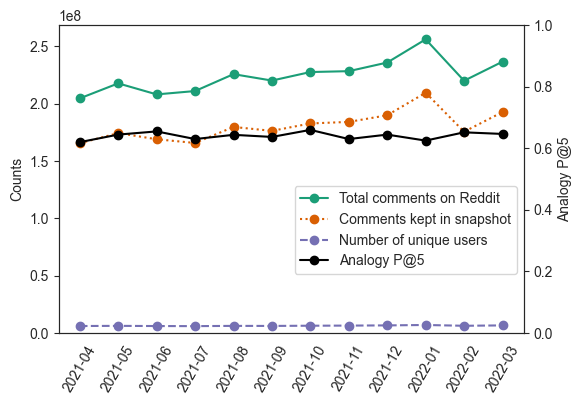

<Figure size 640x480 with 0 Axes>

In [7]:
fig, ax = plt.subplots(figsize=[6,4])
total_comments_line = ax.plot('month', 'total_comments', data=metrics_df, label="Total comments on Reddit", marker='o')
snapshot_comments_line = ax.plot('month', 'community2vec_comments', data=metrics_df, label="Comments kept in snapshot", marker='o', linestyle=":")
users_line = ax.plot('month', 'num_users', data=metrics_df, label="Number of unique users", linestyle="--", marker='o')
#analogies_line = ax.plot('month', 'total_analogies_available', data=metrics_df, label="Maximum solvable analogies", linestyle="-.", marker='o')
#ax.set_yscale('log')
ax.set_ylabel("Counts")# (log scale)")
ax.set_ylim(bottom=0)
plt.legend()
plt.xticks(rotation=60)

ax2 = ax.twinx()
p_line = ax2.plot("month", "analogy_accuracy", data=metrics_df, label="Analogy P@5", color="black", marker='o')
ax2.set_ylim(0,1)
ax2.set_ylabel("Analogy P@5")

lns = total_comments_line + snapshot_comments_line + users_line + p_line
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc="best", bbox_to_anchor=(1, 0.5))


plt.savefig(VIZ_PATH / "snapshot_stats.png", bbox_inches="tight")


plt.show()
plt.clf()

In [8]:
analogies_df = pd.DataFrame.from_records(detailed_analogy_results_list)
display(analogies_df)

,month,Category,Correct Analogies,Solvable Analogies
0,2021-04,Major League Baseball,285,406
1,2021-04,National Basketball Association,349,435
2,2021-04,National Football League,274,378
3,2021-04,National Hockey League,216,378
4,2021-04,University-City Pairs,820,1540
5,2021-05,Major League Baseball,277,406
6,2021-05,National Basketball Association,355,435
7,2021-05,National Football League,286,378
8,2021-05,National Hockey League,208,325
9,2021-05,University-City Pairs,690,1275


0 [('2021-04', '2021-10')]
1 [('2021-10', '2022-03'), ('2021-04', '2021-07')]
2 [('2021-09', '2022-02')]
3 [('2021-04', '2021-07'), ('2022-01', '2022-03')]
4 []


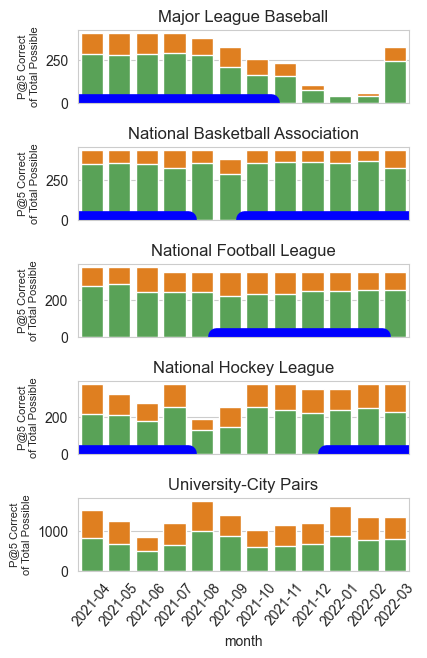

In [9]:
sns.set_style("whitegrid")
sns.set_palette("Dark2")
fig, axes = plt.subplots(5, 1, figsize=(4, 6))
fig.tight_layout()
axes = axes.flatten()
for i, (category, ax) in enumerate(zip(category_labels, axes)):
    cat_df = analogies_df[analogies_df["Category"] == category]

    # Switch comment lines for black & white
    sns.barplot(data=cat_df, ax=ax, x="month", y="Solvable Analogies", color="#ff7f00", errorbar=None)
    #sns.barplot(data=cat_df, ax=ax, x="month", y="Solvable Analogies", color="#cfcfcf", errorbar=None)
    sns.barplot(data=cat_df, ax=ax, x="month", y="Correct Analogies", color="#4daf4a", errorbar=None)
    #sns.barplot(data=cat_df, ax=ax, x="month", y="Correct Analogies", color="#838383", errorbar=None)

    ax.set_title(category)
    print(i, season_dates[i])
    for season_tuple in season_dates[i]:
        season_start = MONTHS.index(season_tuple[0]) / len(MONTHS)
        season_end = (MONTHS.index(season_tuple[1]) +1) / len(MONTHS)
        #
        #ax.axhline(y=1, xmin=season_start, xmax=season_end, c="black", linewidth=12)
        ax.axhline(y=1, xmin=season_start, xmax=season_end, c="blue", linewidth=12)

    ax.set_ylabel("P@5 Correct\nof Total Possible", fontsize=8)
    if i<4:
        ax.get_xaxis().set_visible(False)
    else:
        ax.set_xticklabels(MONTHS, rotation = 50)

plt.savefig(VIZ_PATH / "analogies_solved.png", bbox_inches="tight")